# Ejercicios de codificación

## Ejercicio 0: organizar carpetas

In [24]:
import os 
import shutil
# Crear carperta galton
# Crear carpeta input en galton
# Crear carpeta output en galton
# Crear carpeta src en galton
os.makedirs("galton", exist_ok=True)
carpetas = ["input", "output", "src"]
for i in carpetas:
    os.makedirs(f"galton/{i}", exist_ok=True)

In [25]:
# EXTRA NO VISTO EN CLASE
### Utiliza os.rename() para cambiar el nombre de Galton_s_dataset_of_parent_and_child_heights_1276_68.csv a galton.csv
os.rename("Galton_s_dataset_of_parent_and_child_heights_1276_68.csv", "galton.csv")

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado: 'Galton_s_dataset_of_parent_and_child_heights_1276_68.csv' -> 'galton.csv'

In [ ]:
# Mueve galton.csv a la carpeta galton/input
shutil.move("galton.csv", "galton/input")

'galton/input\\galton.csv'

In [27]:
# Crea un archivo resultados.txt en galton/output en modo append
file = open("galton/output/resultados.txt", "a")

## Ejercicio 1: Genera los datos ejecutando esta celda
Esto te dará una lista de números con los que trabajar en los ejercicios restantes.

In [28]:
# Leer galton.csv desde galton/input
import pandas as pd

galton = pd.read_csv('galton/input/galton.csv')
galton.head()

,Unnamed: 0,X,family,father,mother,sex,height,nkids
0,1,1,1,78.5,67.0,M,73.2,4
1,2,2,1,78.5,67.0,F,69.2,4
2,3,3,1,78.5,67.0,F,69.0,4
3,4,4,1,78.5,67.0,F,69.0,4
4,5,5,2,75.5,66.5,M,73.5,4


In [29]:
# EXTRA NO HECHO EN CLASE
# 1. Seleccionar sólo las hijas (sex == 'F') 
# 2. Eliminar todas las columnas salvo "mother" y "height"
galton_hijas = galton[galton['sex'] == 'F']
galton_hijas.drop(columns=['Unnamed: 0', 'X', 'family', 'father', 
                           'sex', 'nkids'], inplace=True)
galton_hijas.head()

C:\Users\pabma\AppData\Local\Temp\ipykernel_24184\3150998288.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  galton_hijas.drop(columns=['Unnamed: 0', 'X', 'family', 'father',


,mother,height
1,67.0,69.2
2,67.0,69.0
3,67.0,69.0
6,66.5,65.5
7,66.5,65.5


## Ejercicio 2: Cálculo de estadísticas y verificación
### media

In [30]:
# Calcula la media
# EXTRA NO VISTO EN CLASE
# Usa file.write() para guardar la cadena "La altura media de las madres es de X\n" en el fichero resultados
# Recuerda sustituir X por el valor de la media de las madres
# Recuerda para que sirve \n
galton_hijas.mean()
media_madres = round(galton_hijas['mother'].mean(), 2)
file.write(f"La altura media de las madres es de {media_madres}\n")
file.close()

In [31]:
# Calcula la media de las hijas usando un bucle for usando el atributo values
altura_media = 0
for i in galton_hijas['height'].values:
    altura_media += i
altura_media_hijas = round(altura_media / len(galton_hijas['height'].values), 2)
altura_media_hijas 

64.11

In [36]:
# Calcula la media de las madres usando un bucle for e iterrows()
media_madres = 0
for i, j in galton_hijas[['mother']].iterrows():
    media_madres += j
media_madres = round(media_madres/len(galton_hijas[['mother']]), 2)
media_madres

mother    64.17
Name: 1, dtype: float64

### mediana

In [39]:
# Calcula la mediana
# EXTRA NO VISTO EN CLASE
# Usa file.write() para guardar la cadena "La altura mediana de las hijas es de X\n" en el fichero resultados
# Recuerda sustituir X por el valor de la mediana de las hijas
mediana_hijas = galton_hijas['height'].median()
file = open("galton/output/resultados.txt", "a")
file.write(f"La altura mediana de las hijas es de {mediana_hijas}\n")
file.close()

In [63]:
# Calcula la mediana de la altura de las madres accediendo al valor/es en la mitad de la columna de alturas de las hijas con iloc
# Recuerda:
# 1. Ordenar por altura de las hijas
# 2. Reiniciar el index
galton_hijas.sort_values('mother', inplace=True)
galton_hijas.reset_index(drop=True, inplace=True)
indice = int(len(galton_hijas['mother'])/2 + 0.5) # Es impar
mediana_madres = galton_hijas['mother'][indice]
media_madres

C:\Users\pabma\AppData\Local\Temp\ipykernel_24184\2731941465.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  galton_hijas.sort_values('mother', inplace=True)


mother    64.17
Name: 1, dtype: float64

### moda

In [76]:
# Calcula la moda
# EXTRA NO VISTO EN CLASE
# Usa file.write() para guardar la moda de madres e hijas
# Recuerda sustituir X por el valor de la moda
# Si existe más de una moda para madres o hijas, utiliza un bucle FOR
moda_hijas = galton_hijas['height'].mode()[0]
moda_madres = galton_hijas['mother'].mode()[0]

if len(galton_hijas['height'].mode()) > 1:
    moda_hijas = [x for x in galton_hijas['height'].mode()]
    moda_hijas.split(", ")
elif len(galton_hijas['mother'].mode()) > 1: 
    moda_madres = [x for x in galton_hijas['mother'].mode()]
    moda_madres.split(", ")

file = open("galton/output/resultados.txt", "a")
file.write(f"La moda de las hijas es de {moda_hijas} y la de las madres es {moda_madres}\n")
file.close()

In [83]:
# Comprueba que el resultado de la moda es correcta para madres e hijas usando .values_counts()
galton_hijas['mother'].value_counts()
galton_hijas['height'].value_counts()

height
65.0    47
63.0    43
62.0    38
64.0    37
66.0    32
65.5    23
62.5    22
64.5    22
63.5    20
61.0    18
60.0    18
67.0    17
66.5    13
68.0    12
67.5     8
69.0     6
61.5     6
63.7     5
60.5     5
70.5     3
65.2     3
68.5     3
63.2     3
61.7     3
62.7     2
70.0     2
67.2     2
66.7     2
69.2     2
57.0     2
65.7     2
68.7     1
64.2     1
59.0     1
57.5     1
62.3     1
64.7     1
58.0     1
60.1     1
61.2     1
62.2     1
56.0     1
69.5     1
Name: count, dtype: int64

### Cerrar el archivo!

In [89]:
# EXTRA NO VISTO EN CLASE
# comprueba si se ha escrito algo en resultados.txt
# utiliza file.close() para cerrar resultados.txt
# comprueba si se ha escrito algo en resultados.txt

if os.path.getsize("galton/output/resultados.txt") > 0:
    print('No esta vacio')
else:
    print('Esta vacio')

No esta vacio


### varianza de la muestra
Recuerde utilizar la corrección de Bessel.

In [90]:
## Calcula la varianza
galton_hijas.var()

mother    5.184809
height    5.618415
dtype: float64

In [92]:
# Calcula la varianza con N en lugar de N-1
galton_hijas.var(ddof=0)

mother    5.172835
height    5.605439
dtype: float64

### desviación típica de la muestra
Recuerde utilizar la corrección de Bessel.

In [93]:
# Calcula la desviación típica
galton_hijas.std()

mother    2.277018
height    2.370320
dtype: float64

In [94]:
# Calcula la desviación típica con N en lugar de N-1
galton_hijas.std(ddof=0)

mother    2.274387
height    2.367581
dtype: float64

In [95]:
# Comprueba el % de valores a 1 desviación típica de distancia ¿Está próximo al 68%?
std_mas_1 = galton_hijas["mother"].mean() + galton_hijas["mother"].std()
std_menos_1 = galton_hijas["mother"].mean() - galton_hijas["mother"].std()
len(galton_hijas[(galton_hijas["mother"]<=std_mas_1) & ((galton_hijas["mother"]>=std_menos_1))])/len(galton_hijas)

0.7344110854503464

In [96]:
# Comprueba el % de valores a 2 desviación típica de distancia ¿Está próximo al 95.5%?
std_mas_1 = galton_hijas["mother"].mean() + 2 * galton_hijas["mother"].std()
std_menos_1 = galton_hijas["mother"].mean() - 2 * galton_hijas["mother"].std()
len(galton_hijas[(galton_hijas["mother"]<=std_mas_1) & ((galton_hijas["mother"]>=std_menos_1))])/len(galton_hijas)

0.9284064665127021

In [97]:
# Comprueba el % de valores a 3 desviación típica de distancia ¿Está próximo al 99.7%?
std_mas_1 = galton_hijas["mother"].mean() + 3 * galton_hijas["mother"].std()
std_menos_1 = galton_hijas["mother"].mean() - 3 * galton_hijas["mother"].std()
len(galton_hijas[(galton_hijas["mother"]<=std_mas_1) & ((galton_hijas["mother"]>=std_menos_1))])/len(galton_hijas)

1.0

## Ejercicio 3: Calcular más estadísticas
### rango

In [98]:
# Calcula el rango
galton_hijas.max() - galton_hijas.min()

mother    12.5
height    14.5
dtype: float64

### coeficiente de variación
Asegúrese de utilizar la desviación típica de la muestra.

In [ ]:
# Calcula el coeficiente de variación

### rango intercuartílico

In [99]:
# Calcula el rango intercuartílico
galton_hijas.quantile(0.75) - galton_hijas.quantile(0.25)

mother    2.5
height    3.0
dtype: float64

In [100]:
# Calcula el percentil 50%.
# Interpreta el percentil 50%
# ¿Cuál es la diferencia entre el percentil 50% y la mediana?
galton_hijas.quantile(0.5)

mother    64.0
height    64.0
Name: 0.5, dtype: float64

### coeficiente de dispersión por cuartiles

In [101]:
# Calcula el Coeficiente de Dispersión por Cuartiles
cdq = (galton_hijas.quantile(0.75)-galton_hijas.quantile(0.25))/(galton_hijas.quantile(0.75)+galton_hijas.quantile(0.25))

## Ejercicio 4: Escalado de datos
### escalado min-max

In [103]:
# Calcula el escalado min-max 
galton_min_max = (galton_hijas - galton_hijas.min()) / (galton_hijas.max() - galton_hijas.min())
galton_min_max

,mother,height
0,0.00,0.689655
1,0.00,0.620690
2,0.00,0.482759
3,0.04,0.482759
4,0.04,0.724138
...,...,...
428,0.88,0.413793
429,0.88,0.551724
430,0.88,0.689655
431,0.88,0.965517


In [104]:
# Comprueba que para cada columna el mínimo es 0 y el máximo es 1
galton_min_max.describe()

,mother,height
count,433.000000,433.000000
mean,0.493561,0.559321
std,0.182161,0.163470
min,0.000000,0.000000
25%,0.400000,0.448276
50%,0.480000,0.551724
75%,0.600000,0.655172
max,1.000000,1.000000


### normalización

In [107]:
# Utiliza preprocessing.StandardScaler().fit() para normalizar el dataframe
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(galton_hijas)
galton_std = std_scale.transform(galton_hijas)


In [114]:
# Comprueba que la media es aproximadamente 0 y la desviación típica aproximadamente 1
galton_std_df = pd.DataFrame(galton_std)
galton_std_df.describe()

,0,1
count,4.330000e+02,4.330000e+02
mean,-1.115864e-15,-3.560919e-15
std,1.001157e+00,1.001157e+00
min,-2.712606e+00,-3.425506e+00
25%,-5.142111e-01,-6.800873e-01
50%,-7.453218e-02,-4.652921e-02
75%,5.849863e-01,5.870289e-01
max,2.783381e+00,2.698889e+00


## Ejercicio 5: Cálculo de covarianza y correlación
### covarianza

In [109]:
# Calcula la covarianza
galton_hijas.cov()

,mother,height
mother,5.184809,1.693111
height,1.693111,5.618415


### Coeficiente de correlación de Pearson ($\rho$)

In [110]:
# Calcula la correlación
galton_hijas.corr()

,mother,height
mother,1.000000,0.313698
height,0.313698,1.000000


In [112]:
# Calcula la correlacion para el escalado min-max
galton_min_max.corr()
# EXTRA no visto en clase
# Calcula la covarianza para el escalado min-max
galton_min_max.cov()

,mother,height
mother,0.033183,0.009341
height,0.009341,0.026723


In [116]:
# Calcula la correlacion para la normalización
galton_std_df.corr()
# EXTRA no visto en clase
# Calcula la covarianza para la normalización
galton_std_df.cov()

,0,1
0,1.002315,0.314425
1,0.314425,1.002315


In [ ]:
# Calcula la correlacion para los datos convertidos de pulgadas a metros
# EXTRA no visto en clase
# Calcula la covarianza para los datos convertidos de pulgadas a metros

In [ ]:
# Calcula la correlacion para los datos de las hijas convertidos de pulgadas a metros y de las madre habiendo restado 20
# EXTRA no visto en clase
# Calcula la covarianza para los datos convertidos de las hijas convertidos de pulgadas a metros y de las madre habiendo restado 20

In [ ]:
# Interpreta: tanto la covarianza como la correlación miden la intensidad de la relación lineal entre dos variables
# ¿Qué ventaja tiene la correlación sobre la covarianza?

In [117]:
# EXTRA NO VISTO EN CLASE
# Las siguientes listas muestran el nivel de picante de unos tacos y las unidades vendidas apra ese nivel de picante
# Esto es, para un nivel de picante 6 se vendieron 613 tacos
picante = [4,5,6,7,8,9,10,11,12,13,14]
ventas = [310,474,613,726,814,877,914,926,913,874,810]
# Convierte ambas listas en un dataframe llamado df
data = pd.DataFrame()
data['picante'] = picante
data['ventas'] = ventas

In [118]:
# Calcula la correlación entre el nivel de picor y las ventas
data.corr()

,picante,ventas
picante,1.000000,0.816237
ventas,0.816237,1.000000


<Axes: xlabel='picante', ylabel='ventas'>

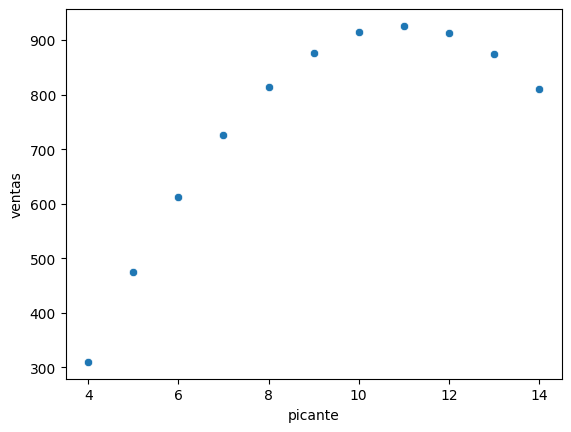

In [120]:
# Ejecuta el siguiente código
import seaborn as sns
sns.scatterplot(data, x="picante", y="ventas")
# La correlación es una relación lineal, es decir, debe asemejarse a una línea recta
# ¿Se parece el gráfico a una línea recta? Si no se parece, no puedes usar la correlación calculada!

In [121]:
# EXTRA NO VISTO EN CLASE
# Las siguientes listas muestran la longitud milimetros de un componente electrónico para ser insertado en un procesador y el número de procesadores que funcionan 
# correctamente sobre 400 probadas. 
# Esto es, para una longitud de 0.0007 milimetros funcionan correctamente 395 procesadores de las 400 probadas
milimetros = [0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.0010,0.0011,0.0012,0.0013,0.0014,0.0015, 0.0016]
procesadores = [400,398,396,395,394,393,394,392,393,391,27,5,0]
# Convierte ambas listas en un dataframe llamado df2
df2 = pd.DataFrame()
df2['milimetros'] = milimetros
df2['procesadores']  = procesadores

In [122]:
# Calcula la correlación entre ambas variables
df2.corr()

,milimetros,procesadores
milimetros,1.000000,-0.743727
procesadores,-0.743727,1.000000


<Axes: xlabel='milimetros', ylabel='procesadores'>

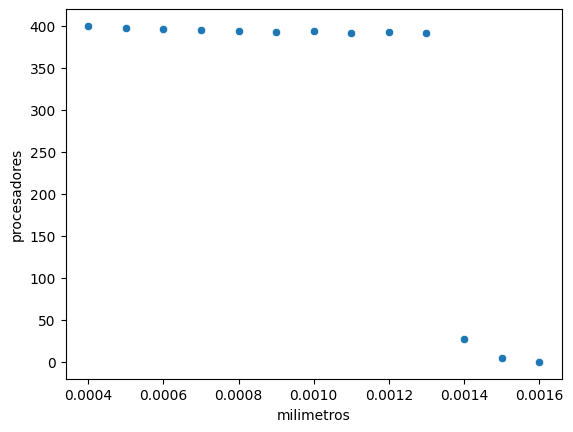

In [124]:
# Realiza un gráfico con seaborn similar al del ejercicio anterior siendo x milimetros e y piezas
# ¿Te parece que realmente existe una correlación líneal negativa entre ambas?
sns.scatterplot(df2, x="milimetros", y="procesadores")


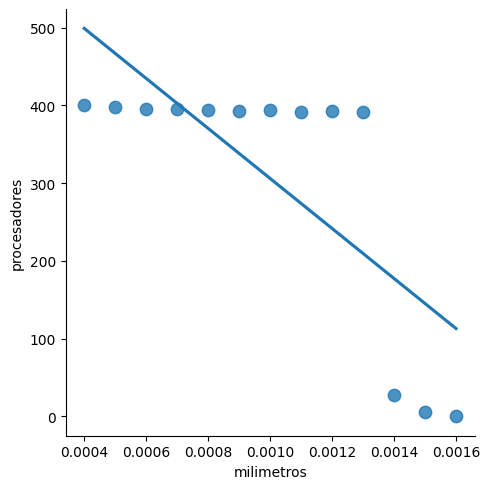

In [125]:
# Ejecuta este código para ver dibujada también la recta de regresión
# ¿Crees que es correcta?
sns.lmplot(x="milimetros", y="procesadores", data=df2,ci=None, scatter_kws={"s": 80});

<hr>
<div style="overflow: hidden; margin-bottom: 10px;">
    <div style="float: left;">
        <a href="./python_101.ipynb">
            <button>Python 101</button>
        </a>
    </div>
    <div style="float: right;">
        <a href="../solutions/ch_01/solutions.ipynb">
            <button>Soluciones</button>
        </a>
        <a href="../ch_02/1-pandas_data_structures.ipynb">
            <button>Capítulo 2 &#8594;</button>
        </a>
    </div>
</div>
<hr>